# MODEL 2: PORTUGUESE SCORES CLASSIFICATION WITH ONLY ONE MIDTERM SCORES

# PART A: DATA LOADING, SETUP, TRANSFORMATION

In [92]:
import pandas as pd
import numpy as np
import matplotlib
#import seaborn as sns 
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split,KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.datasets import make_moons
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from  sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

## 1a. DATA TRANSFORMATION

In [93]:
# initiate path and load data
path_to_data = "/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/data/student"
df = pd.read_csv(path_to_data+'/student-por.csv', sep=";")
print("number of points and features in the data", df.shape)
df.head(5)

number of points and features in the data (649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [94]:
# make pass_fail column to use as target variable
df['pass_fail'] = 'na'
df.loc[(df.G3 >= 10), 'pass_fail'] = 'pass' 
df.loc[(df.G3 < 10), 'pass_fail'] = 'fail' 
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,pass
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,pass
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,pass


In [95]:
# drop final score and midterm 2 score columns because we don't use it
df.drop(columns=['G2', 'G3'], inplace=True)
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,pass
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,pass
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,pass


## 1b. SEPARATE FEATURE AND TARGET VARIABLE

In [96]:
# separate feature and target variable
label = 'pass_fail'
y = LabelEncoder().fit_transform(df[label])
df_X = df.drop(columns=[label])
X = df_X
ftr_names = X.columns
print(X.head())
print(y)

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  internet romantic  famrel  freetime  goout Dalc Walc health absences  G1  
0       no       no       4         3      4    1    1      3        4   0  
1      yes       no       5         3      3    1    1      3        2   9  
2      yes       no       4         3      2    2    3      3        6  12  
3      yes      yes       3         2      2    1    1      5        0  14  
4       no       no       4         3      2    1    2      5        0  11  

[5 rows x 31 columns]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1

## 1c. CHECK BALANCE

In [6]:
classes, counts = np.unique(y,return_counts=True)
print('balance:',np.max(counts/len(y)))

balance: 0.8459167950693375


# PART B: MACHINE LEARNING MODELS & PIPELINE

# 1. Logistic Regression

## 1a. HYPERPARAMETER TUNING

In [7]:
def ML_pipeline_kfold_GridSearchCV_logreg(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    
    # KFold splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    # encoders and preprocessors
    onehot_ftrs = ['school','sex','address','Pstatus','famsize','schoolsup','famsup','paid','activities','nursery',
                    'Mjob', 'Fjob','reason', 'guardian', 'higher', 'internet', 'romantic']
    minmax_ftrs = ['age','absences','G1']
    
    onehot_ftrs_i = [df.columns.get_loc(x) for x in onehot_ftrs]
    minmax_ftrs_i = [df.columns.get_loc(x) for x in minmax_ftrs]

    onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))])
    minmax_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
    
    # collect all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', onehot_transformer, onehot_ftrs_i),
            ('minmax', minmax_transformer, minmax_ftrs_i)])
    
    # make ML pipeline
    pipe = make_pipeline(preprocessor, LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state = 20))

    # the parameter(s) we want to tune
    param_grid = {'logisticregression__C': np.logspace(-2,2, num=8)} 
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,n_jobs=-1)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    
    #get feature names
    feature_names = minmax_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['onehot'][0].get_feature_names(onehot_ftrs))
    
    return grid, grid.score(X_test, y_test), np.array(feature_names), X_test, y_test

In [8]:
import pickle
test_scores = []

for i in range(10):
    print('random state '+str(i+1)) 
    grid, test_score, feature_names, X_test, y_test = ML_pipeline_kfold_GridSearchCV_logreg(X,y,i*42, 5)
    print(grid.best_params_)
    print(i)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    
    # save the output so I can use it later
    fname = '../results/onlyG1por/logreg/onlyG1por_logreg_pipeline'+str(i)+'.save'
    file = open(fname, 'wb')
    pickle.dump((grid, X_test,y_test), file)
    file.close()
    
    test_scores.append(test_score)

mean_test_scores = np.around(np.mean(test_scores),3)
std_test_scores = np.around(np.std(test_scores),3)
print('test accuracy:',mean_test_scores ,'+/-',std_test_scores)

# store mean and std of model's accuracy test score
model_mean = []
model_std = []
model_mean.append(mean_test_scores)
model_std.append(std_test_scores)
print(model_mean)
print(model_std)

# save the output so I can use it later
fname = '../results/onlyG1por/logreg/onlyG1por_logreg_model_mean_std'+'.save'
file = open(fname, 'wb')
pickle.dump((mean_test_scores, std_test_scores, model_mean, model_std), file)
file.close()

random state 1
{'logisticregression__C': 0.517947467923121}
0
best CV score: 0.9036221060492906
test score: 0.8692307692307693
random state 2
{'logisticregression__C': 7.196856730011514}
1
best CV score: 0.8959111277072443
test score: 0.8846153846153846
random state 3
{'logisticregression__C': 1.9306977288832496}
2
best CV score: 0.9037154592979835
test score: 0.8846153846153846
random state 4
{'logisticregression__C': 0.517947467923121}
3
best CV score: 0.9036967886482449
test score: 0.8692307692307693
random state 5
{'logisticregression__C': 1.9306977288832496}
4
best CV score: 0.8997759522031366
test score: 0.9076923076923077
random state 6
{'logisticregression__C': 1.9306977288832496}
5
best CV score: 0.8998693054518299
test score: 0.8769230769230769
random state 7
{'logisticregression__C': 100.0}
6
best CV score: 0.89596713965646
test score: 0.9153846153846154
random state 8
{'logisticregression__C': 7.196856730011514}
7
best CV score: 0.8978715459297983
test score: 0.915384615384

In [9]:
# run pipeline on the best iteration
grid, test_score, feature_names, X_test, y_test= ML_pipeline_kfold_GridSearchCV_logreg(X,y,6*42,5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

# save best params of model
best_params = []
best_params.append(grid.best_params_)
print("best params for ML models:", best_params)

0.89596713965646
0.9153846153846154
{'logisticregression__C': 100.0}
best params for ML models: [{'logisticregression__C': 100.0}]


In [10]:
# save the output so I can use it later
import pickle
fname = '../results/onlyG1por/logreg/onlyG1por_logreg_bestmodel_score'+'.save'
file = open(fname, 'wb')
pickle.dump((grid, X_test,y_test), file)
file.close()

## 1b. FEATURE IMPORTANCE

## 1bi. PERTURBATION

In [11]:
# load saved data
for i in range(10):
    import pickle
    fname = '../results/onlyG1por/logreg/onlyG1por_logreg_pipeline'+str(i)+'.save'
    file = open(fname, 'rb')
    grid, X_test, y_test = pickle.load(file)
    file.close()

In [12]:
np.random.seed(42) #fixed random state in numpy
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

print('test score = ', mean_test_scores)
print('test baseline = ',np.sum(y == 1)/len(y))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.889
test baseline =  0.8459167950693375
shuffling school
   shuffled test score: 0.893 +/- 0.013
shuffling sex
   shuffled test score: 0.903 +/- 0.004
shuffling age
   shuffled test score: 0.908 +/- 0.0
shuffling address
   shuffled test score: 0.908 +/- 0.0
shuffling famsize
   shuffled test score: 0.908 +/- 0.0
shuffling Pstatus
   shuffled test score: 0.908 +/- 0.0
shuffling Medu
   shuffled test score: 0.908 +/- 0.0
shuffling Fedu
   shuffled test score: 0.908 +/- 0.0
shuffling Mjob
   shuffled test score: 0.905 +/- 0.004
shuffling Fjob
   shuffled test score: 0.908 +/- 0.0
shuffling reason
   shuffled test score: 0.902 +/- 0.003
shuffling guardian
   shuffled test score: 0.906 +/- 0.003
shuffling traveltime
   shuffled test score: 0.908 +/- 0.0
shuffling studytime
   shuffled test score: 0.908 +/- 0.0
shuffling failures
   shuffled test score: 0.908 +/- 0.0
shuffling schoolsup
   shuffled test score: 0.908 +/- 0.0
shuffling famsup
   shuffled test score: 0.908 +/- 

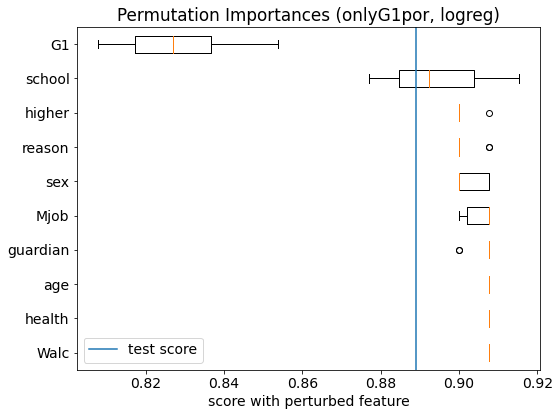

In [13]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[:10][::-1] #order features by how important they are - by how much accuracy score has reduced 
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(mean_test_scores,label='test score') #original test score
plt.title("Permutation Importances (onlyG1por, logreg)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/onlyG1por/logreg/'
plt.savefig(path + 'logreg_perturb.png')
plt.show()

## 1bii. COEFFICIENTS

In [14]:
def ML_pipeline_kfold_GridSearchCV_logreg_ftimp(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    
    # StratifiedKFold
    kf = StratifiedKFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    #encoders and preprocessors
    onehot_ftrs = ['school','sex','address','Pstatus','famsize','schoolsup','famsup','paid','activities','nursery',
                    'Mjob', 'Fjob','reason', 'guardian', 'higher', 'internet', 'romantic']
    minmax_ftrs = ['age','absences','G1']
    
    onehot_ftrs_i = [df.columns.get_loc(x) for x in onehot_ftrs]
    minmax_ftrs_i = [df.columns.get_loc(x) for x in minmax_ftrs]

    onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))])
    minmax_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
    
    # collect all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', onehot_transformer, onehot_ftrs_i),
            ('minmax', minmax_transformer, minmax_ftrs_i)])
    
    # Standard Scaler to standardized
    final_scaler = StandardScaler()
    
    pipe = make_pipeline(preprocessor, final_scaler, LogisticRegression(penalty='l1', solver='saga', max_iter=10000, random_state = 20))

    # the parameter(s) we want to tune
    param_grid = {'logisticregression__C': np.logspace(-2,2, num=8)} 
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,n_jobs=-1)
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    
    feature_names = minmax_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['onehot'][0].get_feature_names(onehot_ftrs))
    
    return grid, grid.score(X_test, y_test), np.array(feature_names), X_test, y_test

In [15]:
grid, test_score, feature_names, X_test, y_test = ML_pipeline_kfold_GridSearchCV_logreg_ftimp(X,y,42, 5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

0.9094286781179985
0.9076923076923077
{'logisticregression__C': 0.13894954943731375}


In [16]:
# save the output so I can use it later
fname = '../results/onlyG1por/logreg/onlyG1por_logreg_coeff'+'.save'
file = open(fname, 'wb')
pickle.dump((grid, X_test,y_test), file)
file.close()

In [17]:
# load saved data
import pickle
fname = '../results/onlyG1por/logreg/onlyG1por_logreg_coeff'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

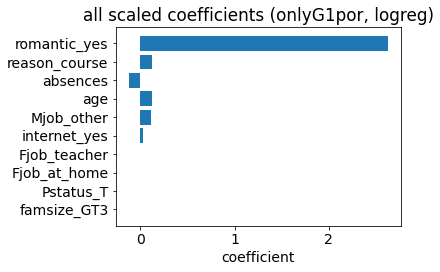

In [18]:
coefs = grid.best_estimator_[-1].coef_[0]
sorted_indcs = np.argsort(np.abs(coefs))

plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(10),coefs[sorted_indcs[-10:]])
plt.yticks(np.arange(10),feature_names[sorted_indcs[-10:]])
plt.xlabel('coefficient')
plt.title('all scaled coefficients (onlyG1por, logreg)')
plt.tight_layout()
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/onlyG1por/logreg/'
plt.savefig(path + 'logreg_coeff.png',bbox_inches='tight')
plt.show()

## 1biii. SHAP

In [19]:
# load saved data
import pickle
fname = '../results/onlyG1por/logreg/onlyG1por_logreg_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

In [20]:
import shap
shap.initjs() # required for visualizations later on
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
#create explainer
explainer = shap.LinearExplainer(grid.best_estimator_[1], X_test_transformed)
#calculate shap values
shap_values = explainer.shap_values(X_test_transformed)
print(np.shape(shap_values))

(130, 46)
(130, 46)


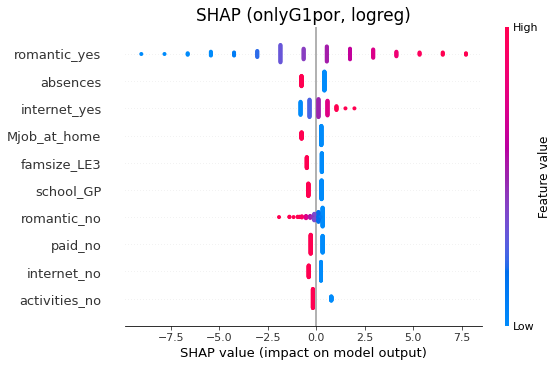

In [21]:
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names, max_display=10, show=False)
plt.title("SHAP (onlyG1por, logreg)")
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/onlyG1por/logreg/'
plt.savefig(path + 'logreg_shap.png',bbox_inches='tight')
plt.show()

4.4897379248900275


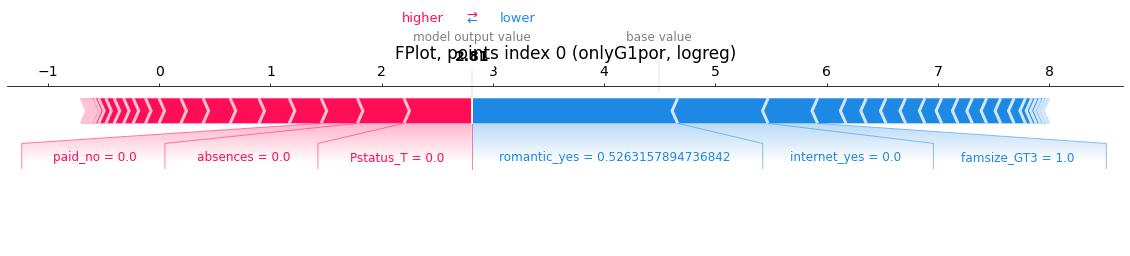

In [22]:
ind = 0
print(explainer.expected_value)
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test_transformed[ind,:],
    feature_names=feature_names
, show=False,matplotlib=True)
plt.title('FPlot, points index 0 (onlyG1por, logreg)')
plt.savefig('../figures/onlyG1por/logreg/logreg_fplot1.png',bbox_inches='tight')

4.4897379248900275


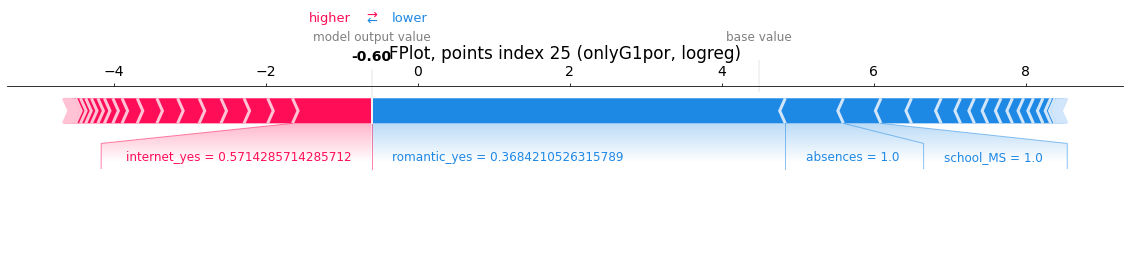

In [23]:
ind = 25
print(explainer.expected_value)
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test_transformed[ind,:],
    feature_names=feature_names
, show=False,matplotlib=True)
plt.title('FPlot, points index 25 (onlyG1por, logreg)')
plt.savefig('../figures/onlyG1por/logreg/logreg_fplot2.png',bbox_inches='tight')

4.4897379248900275


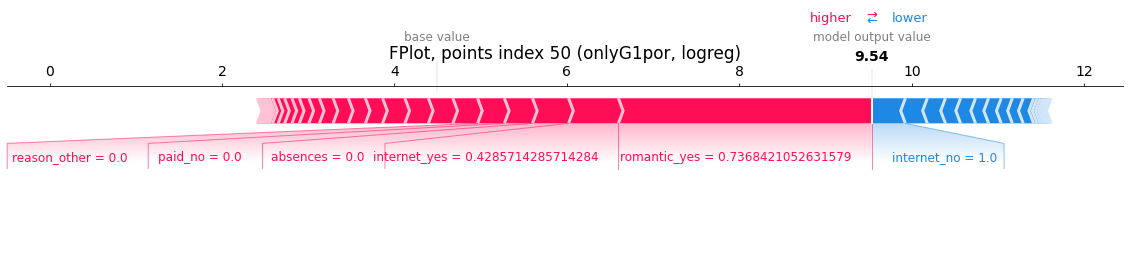

In [24]:
ind = 50
print(explainer.expected_value)
shap.force_plot(
    explainer.expected_value, shap_values[ind,:], X_test_transformed[ind,:],
    feature_names=feature_names
, show=False,matplotlib=True)
plt.title('FPlot, points index 50 (onlyG1por, logreg)')
plt.savefig('../figures/onlyG1por/logreg/logreg_fplot3.png',bbox_inches='tight')

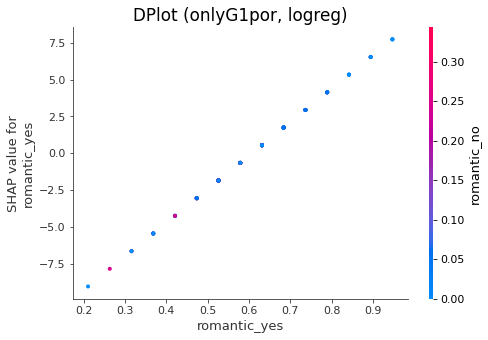

In [25]:
ftr = 'romantic_yes'
shap.dependence_plot(ftr, shap_values, X_test_transformed, feature_names=feature_names, show=False)
plt.title('DPlot (onlyG1por, logreg)')
plt.savefig('../figures/onlyG1por/logreg/logreg_dplot1.png',bbox_inches='tight')

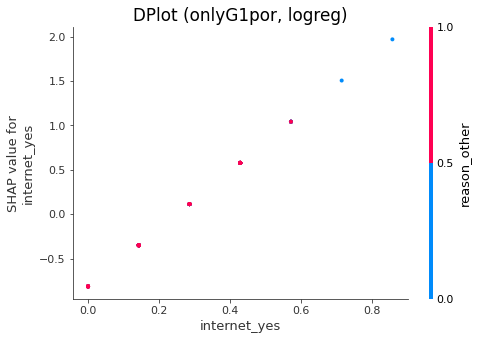

In [26]:
ftr = 'internet_yes'
shap.dependence_plot(ftr, shap_values, X_test_transformed, feature_names=feature_names, show=False)
plt.title('DPlot (onlyG1por, logreg)')
plt.savefig('../figures/onlyG1por/logreg/logreg_dplot3.png',bbox_inches='tight')

## 1c. CONFUSION MATRIX

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [28]:
# load saved data
import pickle
fname = '../results/onlyG1por/logreg/onlyG1por_logreg_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

confusion matrix : [[ 10   8]
 [  3 109]]


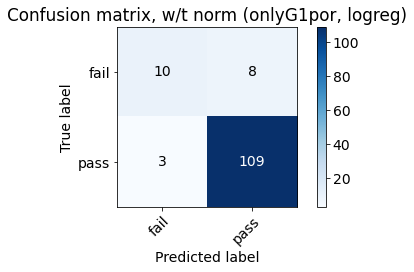

normalized confusion matrix : [[0.55555556 0.44444444]
 [0.02678571 0.97321429]]


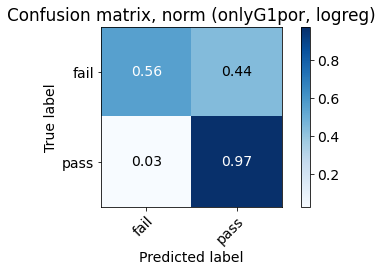

In [29]:
y_pred = grid.best_estimator_.predict(X_test)
# not-normalized
conf_mat = confusion_matrix(y_test, y_pred)
print("confusion matrix :", conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=['fail','pass'])
plt.title('Confusion matrix, w/t norm (onlyG1por, logreg)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/onlyG1por/logreg/'
plt.savefig(path + 'logreg_cm.png')
plt.show()

# normalized
norm_conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
print("normalized confusion matrix :",norm_conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=['fail','pass'],normalize= True )
plt.title('Confusion matrix, norm (onlyG1por, logreg)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/onlyG1por/logreg/'
plt.savefig(path + 'logreg_cmnorm.png')
plt.show()

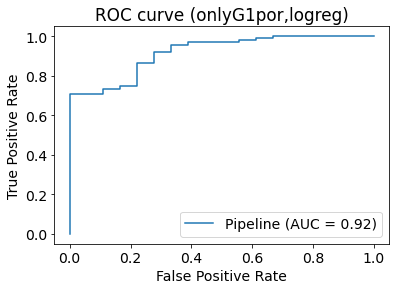

In [30]:
from sklearn import metrics
metrics.plot_roc_curve(grid.best_estimator_, X_test, y_test)
plt.title('ROC curve (onlyG1por,logreg)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/onlyG1por/logreg/'
plt.savefig(path + 'logreg_roc.png')

# 2. RANDOM FOREST CLASSIFIER

## 2a. HYPERPARAMETER TUNING

In [31]:
def ML_pipeline_kfold_GridSearchCV_rf(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    
    # KFold splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    #encoders and preprocessors
    onehot_ftrs = ['school','sex','address','Pstatus','famsize','schoolsup','famsup','paid','activities','nursery',
                    'Mjob', 'Fjob','reason', 'guardian', 'higher', 'internet', 'romantic']
    minmax_ftrs = ['age','absences','G1']
    
    onehot_ftrs_i = [df.columns.get_loc(x) for x in onehot_ftrs]
    minmax_ftrs_i = [df.columns.get_loc(x) for x in minmax_ftrs]

    onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))])
    minmax_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
    
    # collect all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', onehot_transformer, onehot_ftrs_i),
            ('minmax', minmax_transformer, minmax_ftrs_i)])
    
    # make ML pipeline
    pipe = make_pipeline(preprocessor, RandomForestClassifier(n_estimators = 100,random_state=random_state))

    # the parameter(s) we want to tune
    param_grid = {'randomforestclassifier__max_depth': np.linspace(2,30,num=9,dtype=int),
                 'randomforestclassifier__max_features': np.linspace(0.25,1,5)}
    
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,n_jobs=-1)
    
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    
    #get feature names
    feature_names = minmax_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['onehot'][0].get_feature_names(onehot_ftrs))
    
    return grid, grid.score(X_test, y_test), np.array(feature_names), X_test, y_test

In [32]:
import pickle
test_scores = []

for i in range(10):
    print('random state '+str(i+1)) 
    grid, test_score, feature_names, X_test, y_test = ML_pipeline_kfold_GridSearchCV_rf(X,y,i*42, 5)
    print(grid.best_params_)
    print(i)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    
    # save the output so I can use it later
    fname = '../results/onlyG1por/rf/onlyG1por_rf_pipeline'+str(i)+'.save'
    file = open(fname, 'wb')
    pickle.dump((grid, X_test,y_test), file)
    file.close()
    
    test_scores.append(test_score)

mean_test_scores = np.around(np.mean(test_scores),3)
std_test_scores = np.around(np.std(test_scores),3)
print('test accuracy:',mean_test_scores ,'+/-',std_test_scores)

# store mean and std of model's accuracy test score
model_mean.append(mean_test_scores)
model_std.append(std_test_scores)
print(model_mean)
print(model_std)

# save the output so I can use it later
fname = '../results/onlyG1por/rf/onlyG1por_rf_model_mean_std'+'.save'
file = open(fname, 'wb')
pickle.dump((mean_test_scores, std_test_scores, model_mean, model_std), file)
file.close()

random state 1
{'randomforestclassifier__max_depth': 2, 'randomforestclassifier__max_features': 1.0}
0
best CV score: 0.9267176997759521
test score: 0.8923076923076924
random state 2
{'randomforestclassifier__max_depth': 2, 'randomforestclassifier__max_features': 0.625}
1
best CV score: 0.9209111277072441
test score: 0.9153846153846154
random state 3
{'randomforestclassifier__max_depth': 2, 'randomforestclassifier__max_features': 0.625}
2
best CV score: 0.9287714712471994
test score: 0.8846153846153846
random state 4
{'randomforestclassifier__max_depth': 2, 'randomforestclassifier__max_features': 0.625}
3
best CV score: 0.9268110530246453
test score: 0.8923076923076924
random state 5
{'randomforestclassifier__max_depth': 2, 'randomforestclassifier__max_features': 0.625}
4
best CV score: 0.9210231516056758
test score: 0.9153846153846154
random state 6
{'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 1.0}
5
best CV score: 0.9248879761015683
test score: 0.9

In [33]:
# run pipeline on the best iteration
grid, test_score, feature_names, X_test, y_test= ML_pipeline_kfold_GridSearchCV_rf(X,y,6*42,5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

# save best params of model
best_params.append(grid.best_params_)
print("best params for ML models:", best_params)

0.9113890963405528
0.9538461538461539
{'randomforestclassifier__max_depth': 2, 'randomforestclassifier__max_features': 0.625}
best params for ML models: [{'logisticregression__C': 100.0}, {'randomforestclassifier__max_depth': 2, 'randomforestclassifier__max_features': 0.625}]


In [34]:
# save the output so I can use it later
fname = '../results/onlyG1por/rf/onlyG1por_rf_bestmodel_score'+'.save'
file = open(fname, 'wb')
pickle.dump((grid, X_test,y_test), file)
file.close()

## 2b. FEATURE IMPORTANCE

## 2bi. PERTURBATION

In [35]:
# load saved data
for i in range(10):
    import pickle
    fname = '../results/onlyG1por/rf/onlyG1por_rf_pipeline'+str(i)+'.save'
    file = open(fname, 'rb')
    grid, X_test, y_test = pickle.load(file)
    file.close()

In [36]:
np.random.seed(42) #fixed random state in numpy
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

print('test score = ', mean_test_scores)
print('test baseline = ',np.sum(y == 1)/len(y))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.915
test baseline =  0.8459167950693375
shuffling school
   shuffled test score: 0.946 +/- 0.0
shuffling sex
   shuffled test score: 0.946 +/- 0.0
shuffling age
   shuffled test score: 0.946 +/- 0.0
shuffling address
   shuffled test score: 0.946 +/- 0.0
shuffling famsize
   shuffled test score: 0.946 +/- 0.0
shuffling Pstatus
   shuffled test score: 0.946 +/- 0.0
shuffling Medu
   shuffled test score: 0.946 +/- 0.0
shuffling Fedu
   shuffled test score: 0.946 +/- 0.0
shuffling Mjob
   shuffled test score: 0.946 +/- 0.0
shuffling Fjob
   shuffled test score: 0.946 +/- 0.0
shuffling reason
   shuffled test score: 0.946 +/- 0.0
shuffling guardian
   shuffled test score: 0.946 +/- 0.0
shuffling traveltime
   shuffled test score: 0.946 +/- 0.0
shuffling studytime
   shuffled test score: 0.946 +/- 0.0
shuffling failures
   shuffled test score: 0.946 +/- 0.0
shuffling schoolsup
   shuffled test score: 0.946 +/- 0.0
shuffling famsup
   shuffled test score: 0.946 +/- 0.0
shuffl

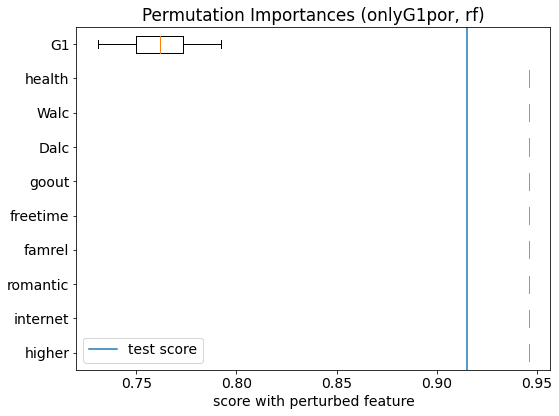

In [37]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[:10][::-1] #order features by how important they are - by how much accuracy score has reduced 
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(mean_test_scores,label='test score') #original test score
plt.title("Permutation Importances (onlyG1por, rf)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/onlyG1por/rf/'
plt.savefig(path + 'rf_perturb.png')
plt.show()

## 2bii. DECISION TREE-NATIVE FEATURE IMPORTANCES METRICS

In [38]:
# load saved data
import pickle
fname = '../results/onlyG1por/rf/onlyG1por_rf_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

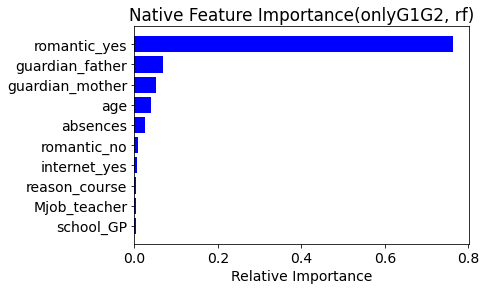

In [39]:
importances = grid.best_estimator_[1].feature_importances_
indices = np.argsort(importances)[-10:]
features = feature_names
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Native Feature Importance(onlyG1G2, rf)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/onlyG1por/rf/'
plt.savefig(path + 'rf_ftnative.png',bbox_inches='tight')
plt.show()

## 2biii. SHAP

In [40]:
# load saved data
import pickle
fname = '../results/onlyG1por/rf/onlyG1por_rf_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

In [41]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid.best_estimator_[1])
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values 
shap_values = explainer.shap_values(X_test_transformed, check_additivity=False)
print(np.shape(shap_values))

(130, 46)
(2, 130, 46)


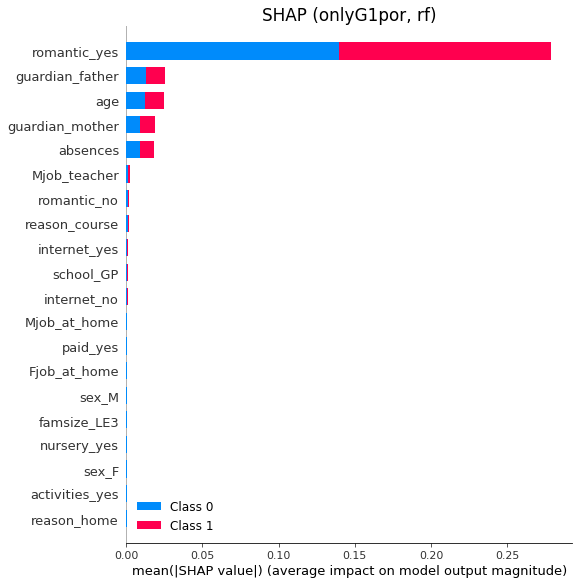

In [42]:
shap.summary_plot(shap_values, X_test_transformed,feature_names = feature_names, show=False)
plt.title("SHAP (onlyG1por, rf)")
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/onlyG1por/rf/'
plt.savefig(path + 'rf_shap.png',bbox_inches='tight')
plt.show()

0.15899807321772638


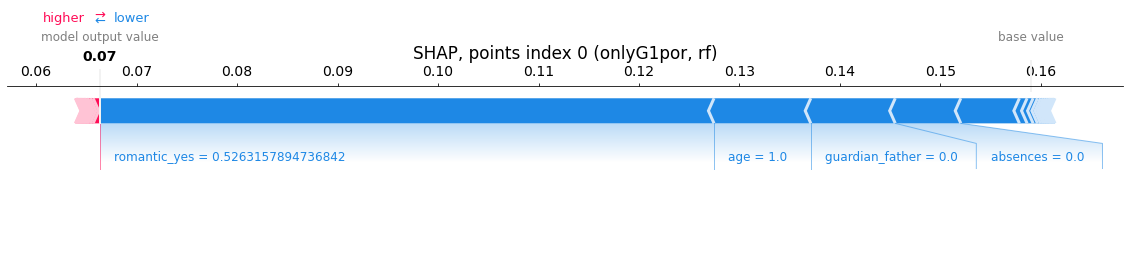

In [43]:
index = 0 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names, show=False,matplotlib=True)
plt.title('SHAP, points index 0 (onlyG1por, rf)')
plt.savefig('../figures/onlyG1por/rf/rf_fplot1.png',bbox_inches='tight')

0.15899807321772638


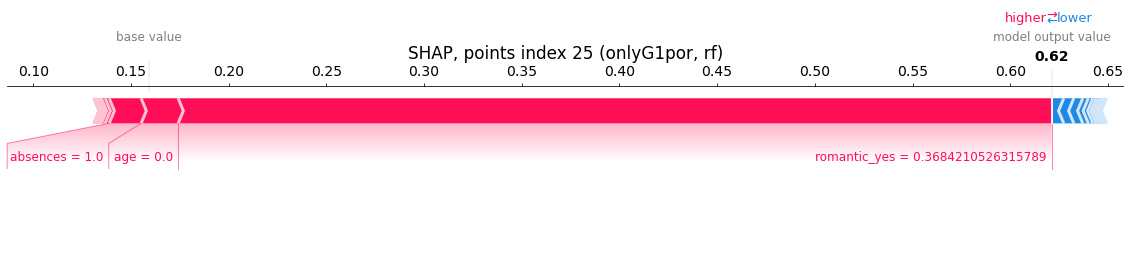

In [44]:
index = 25 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names, show=False,matplotlib=True)
plt.title('SHAP, points index 25 (onlyG1por, rf)')
plt.savefig('../figures/onlyG1por/rf/rf_fplot2.png',bbox_inches='tight')

0.15899807321772638


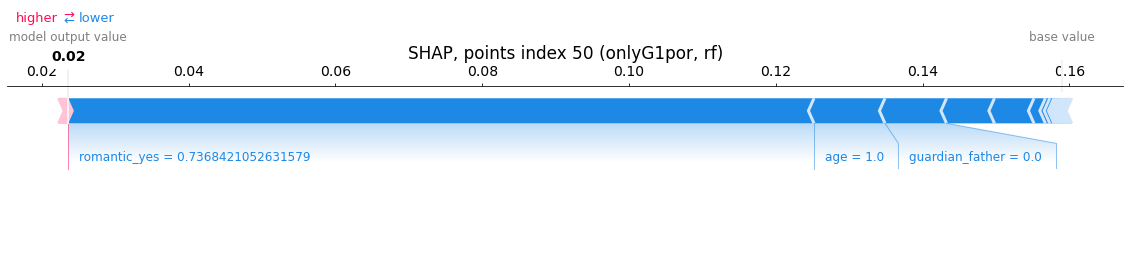

In [45]:
index = 50 # the index of the point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = X_test_transformed[index,:],feature_names = feature_names, show=False,matplotlib=True)
plt.title('SHAP, points index 50 (onlyG1por, rf)')
plt.savefig('../figures/onlyG1por/rf/rf_fplot3.png',bbox_inches='tight')

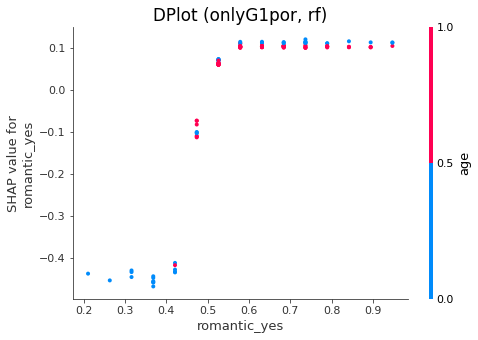

In [46]:
ftr = 'romantic_yes'
shap.dependence_plot(ftr, shap_values[1], X_test_transformed, feature_names=feature_names, show=False)
plt.title('DPlot (onlyG1por, rf)')
plt.savefig('../figures/onlyG1por/rf/rf_dplot1.png',bbox_inches='tight')

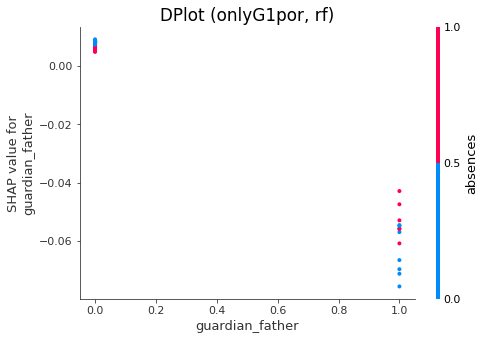

In [47]:
ftr = 'guardian_father'
shap.dependence_plot(ftr, shap_values[1], X_test_transformed, feature_names=feature_names, show=False)
plt.title('DPlot (onlyG1por, rf)')
plt.savefig('../figures/onlyG1por/rf/rf_dplot2.png',bbox_inches='tight')

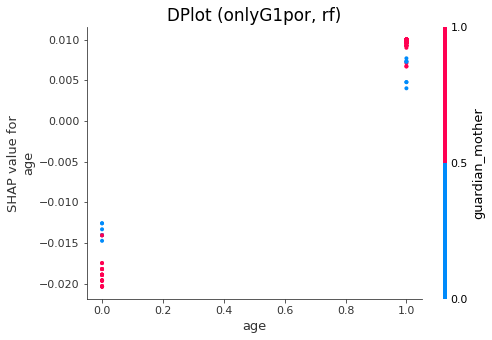

In [48]:
ftr = 'age'
shap.dependence_plot(ftr, shap_values[1], X_test_transformed, feature_names=feature_names, show=False)
plt.title('DPlot (onlyG1por, rf)')
plt.savefig('../figures/onlyG1por/rf/rf_dplot3.png',bbox_inches='tight')

## 2c. CONFUSION MATRIX

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [50]:
# load saved data
import pickle
fname = '../results/onlyG1por/rf/onlyG1por_rf_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

confusion matrix : [[ 14   4]
 [  2 110]]


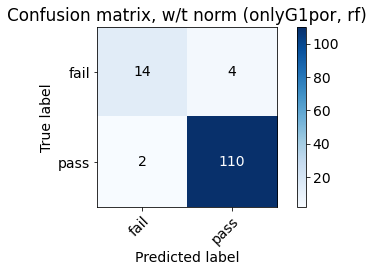

normalized confusion matrix : [[0.77777778 0.22222222]
 [0.01785714 0.98214286]]


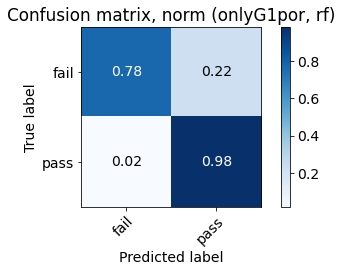

In [51]:
y_pred = grid.best_estimator_.predict(X_test)
#not-normalized
conf_mat = confusion_matrix(y_test, y_pred)
print("confusion matrix :", conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=['fail','pass'])
plt.title('Confusion matrix, w/t norm (onlyG1por, rf)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/onlyG1por/rf/'
plt.savefig(path + 'rf_cm.png',bbox_inches='tight')
plt.show()

#normalized
norm_conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
print("normalized confusion matrix :",norm_conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=['fail','pass'],normalize= True )
plt.title('Confusion matrix, norm (onlyG1por, rf)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/onlyG1por/rf/'
plt.savefig(path + 'rf_cmnorm.png',bbox_inches='tight')
plt.show()

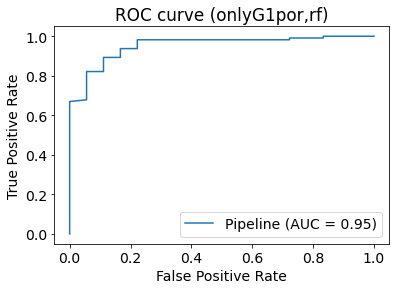

In [52]:
from sklearn import metrics
metrics.plot_roc_curve(grid.best_estimator_, X_test, y_test)
plt.title('ROC curve (onlyG1por,rf)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/onlyG1por/rf/'
plt.savefig(path + 'rf_roc.png')

# 3. SVC

## 3a. HYPERPARAMETER TUNING

In [53]:
def ML_pipeline_kfold_GridSearchCV_svc(X,y,random_state,n_folds):
    # create a test set
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, random_state = random_state)
    
    # KFold splitter for _other
    kf = KFold(n_splits=n_folds,shuffle=True,random_state=random_state)
    
    # encoders and preprocessors
    onehot_ftrs = ['school','sex','address','Pstatus','famsize','schoolsup','famsup','paid','activities','nursery',
                    'Mjob', 'Fjob','reason', 'guardian', 'higher', 'internet', 'romantic']
    minmax_ftrs = ['age','absences','G1']
    
    onehot_ftrs_i = [df.columns.get_loc(x) for x in onehot_ftrs]
    minmax_ftrs_i = [df.columns.get_loc(x) for x in minmax_ftrs]

    onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))])
    minmax_transformer = Pipeline(steps=[('minmax', MinMaxScaler())])
    
    # collect all the encoders
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', onehot_transformer, onehot_ftrs_i),
            ('minmax', minmax_transformer, minmax_ftrs_i)])
    
    # make ML pipeline
    pipe = make_pipeline(preprocessor,SVC(random_state = 20))

    # the parameter(s) we want to tune
    param_grid = {'svc__C': np.logspace(-3,4,num=8),'svc__gamma': np.logspace(-3,4,num=8)}
    
    # prepare gridsearch
    grid = GridSearchCV(pipe, param_grid=param_grid,scoring = make_scorer(accuracy_score),
                        cv=kf, return_train_score = True,n_jobs=-1)
    
    # do kfold CV on _other
    grid.fit(X_other, y_other)
    
    #get feature names
    feature_names = minmax_ftrs + \
                list(grid.best_estimator_[0].named_transformers_['onehot'][0].get_feature_names(onehot_ftrs))
    
    return grid, grid.score(X_test, y_test), np.array(feature_names), X_test, y_test

In [54]:
import pickle
test_scores = []

for i in range(10):
    print('random state '+str(i+1)) 
    grid, test_score, feature_names, X_test, y_test = ML_pipeline_kfold_GridSearchCV_svc(X,y,i*42, 5)
    print(grid.best_params_)
    print(i)
    print('best CV score:',grid.best_score_)
    print('test score:',test_score)
    
    # save the output so I can use it later
    fname = '../results/onlyG1por/svc/onlyG1por_svc_pipeline'+str(i)+'.save'
    file = open(fname, 'wb')
    pickle.dump((grid, X_test,y_test), file)
    file.close()
    
    test_scores.append(test_score)

mean_test_scores = np.around(np.mean(test_scores),3)
std_test_scores = np.around(np.std(test_scores),3)
print('test accuracy:',mean_test_scores ,'+/-',std_test_scores)

# store mean and std of model's accuracy test score
model_mean.append(mean_test_scores)
model_std.append(std_test_scores)
print(model_mean)
print(model_std)

# save the output so I can use it later
fname = '../results/onlyG1por/svc/onlyG1por_svc_model_mean_std'+'.save'
file = open(fname, 'wb')
pickle.dump((mean_test_scores, std_test_scores, model_mean, model_std), file)
file.close()

random state 1
{'svc__C': 1000.0, 'svc__gamma': 0.001}
0
best CV score: 0.8747012696041822
test score: 0.8769230769230769
random state 2
{'svc__C': 1000.0, 'svc__gamma': 0.001}
1
best CV score: 0.8785660941000746
test score: 0.8846153846153846
random state 3
{'svc__C': 10000.0, 'svc__gamma': 0.001}
2
best CV score: 0.8940440627333832
test score: 0.8846153846153846
random state 4
{'svc__C': 1000.0, 'svc__gamma': 0.001}
3
best CV score: 0.8863144137415983
test score: 0.8538461538461538
random state 5
{'svc__C': 1000.0, 'svc__gamma': 0.001}
4
best CV score: 0.8805078416728902
test score: 0.8769230769230769
random state 6
{'svc__C': 1000.0, 'svc__gamma': 0.001}
5
best CV score: 0.8940627333831218
test score: 0.8692307692307693
random state 7
{'svc__C': 1000.0, 'svc__gamma': 0.001}
6
best CV score: 0.882486930545183
test score: 0.9
random state 8
{'svc__C': 1000.0, 'svc__gamma': 0.001}
7
best CV score: 0.8882374906646751
test score: 0.8615384615384616
random state 9
{'svc__C': 10000.0, 'svc

In [55]:
# run pipeline on the best iteration
grid, test_score, feature_names, X_test, y_test= ML_pipeline_kfold_GridSearchCV_svc(X,y,9*42,5)
print(grid.best_score_)
print(grid.score(X_test,y_test))
print(grid.best_params_)

# save best params of model
best_params.append(grid.best_params_)
print("best params for ML models:", best_params)

0.8613330843913367
0.9153846153846154
{'svc__C': 1000.0, 'svc__gamma': 0.001}
best params for ML models: [{'logisticregression__C': 100.0}, {'randomforestclassifier__max_depth': 2, 'randomforestclassifier__max_features': 0.625}, {'svc__C': 1000.0, 'svc__gamma': 0.001}]


In [56]:
# save the output so I can use it later
fname = '../results/onlyG1por/svc/onlyG1por_svc_bestmodel_score'+'.save'
file = open(fname, 'wb')
pickle.dump((grid, X_test,y_test), file)
file.close()

## 3b. FEATURE IMPORTANCE

## 3bi. PERTURBATION

In [57]:
# load saved data
import pickle
for i in range(10):
    fname = '../results/onlyG1por/svc/onlyG1por_svc_pipeline'+str(i)+'.save'
    file = open(fname, 'rb')
    grid, X_test, y_test = pickle.load(file)
    file.close()

In [58]:
np.random.seed(42) #fixed random state in numpy
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

print('test score = ', mean_test_scores)
print('test baseline = ',np.sum(y == 1)/len(y))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.875
test baseline =  0.8459167950693375
shuffling school
   shuffled test score: 0.891 +/- 0.01
shuffling sex
   shuffled test score: 0.915 +/- 0.0
shuffling age
   shuffled test score: 0.915 +/- 0.0
shuffling address
   shuffled test score: 0.903 +/- 0.005
shuffling famsize
   shuffled test score: 0.912 +/- 0.004
shuffling Pstatus
   shuffled test score: 0.915 +/- 0.0
shuffling Medu
   shuffled test score: 0.915 +/- 0.0
shuffling Fedu
   shuffled test score: 0.915 +/- 0.0
shuffling Mjob
   shuffled test score: 0.902 +/- 0.008
shuffling Fjob
   shuffled test score: 0.918 +/- 0.01
shuffling reason
   shuffled test score: 0.908 +/- 0.005
shuffling guardian
   shuffled test score: 0.913 +/- 0.004
shuffling traveltime
   shuffled test score: 0.915 +/- 0.0
shuffling studytime
   shuffled test score: 0.915 +/- 0.0
shuffling failures
   shuffled test score: 0.915 +/- 0.0
shuffling schoolsup
   shuffled test score: 0.911 +/- 0.005
shuffling famsup
   shuffled test score: 0.912 

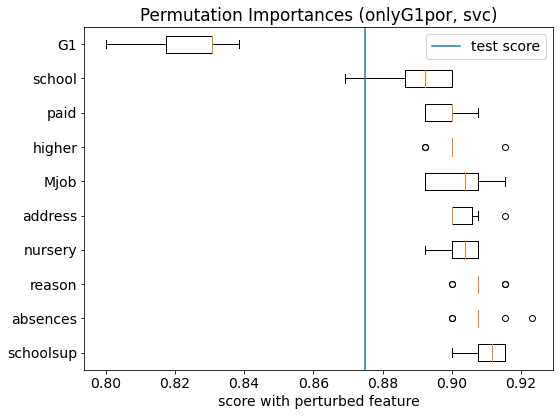

In [59]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[:10][::-1] #order features by how important they are - by how much accuracy score has reduced 
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(mean_test_scores,label='test score') #original test score
plt.title("Permutation Importances (onlyG1por, svc)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/onlyG1por/svc/'
plt.savefig(path + 'svc_perturb.png')
plt.show()

## 3bii. SHAP

In [108]:
df_class = df.copy()
df_class.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,pass_fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,0,pass
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,9,pass
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,11,pass


In [109]:
# Drop final score column
# Separate feature matrix and target variable
y_class = df_class['pass_fail'] #predict final grades so make final grades 'G3' the target variable
X_class = df_class.loc[:, df_class.columns != 'pass_fail'] 
#print("target variable:",y_class)
#print("feaature matrix:", X_class.head())

In [110]:
random_state = 42

#encoders and preprocessors
onehot_ftrs = ['school','sex','address','Pstatus','famsize','schoolsup','famsup','paid','activities','nursery',
                'Mjob', 'Fjob','reason', 'guardian', 'higher', 'internet', 'romantic']
minmax_ftrs = ['age','absences','G1']
ordinal_ftrs = ['Medu', 'Fedu', 'health','freetime', 'goout','famrel' 'Dalc', 'Walc', 
            'traveltime','studytime', 'failures'] #already pre processed

onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(sparse=False))])
minmax_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
       ('onehot', onehot_transformer, onehot_ftrs),
            ('minmax', minmax_transformer, minmax_ftrs)])
                                 
X_class_other, X_class_test, y_class_other, y_class_test = train_test_split(X_class,y_class,test_size = 0.2,random_state=random_state)
kf = KFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_class_other,y_class_other):
    X_class_train = X_class_other.iloc[train_index]
    y_class_train = y_class_other.iloc[train_index]
    X_class_val = X_class_other.iloc[val_index]
    y_class_val = y_class_other.iloc[val_index]

#X
X_class_train_prep = preprocessor.fit_transform(X_class_train)
X_class_test_prep = preprocessor.transform(X_class_test)
X_class_val_prep = preprocessor.transform(X_class_val)

#y
le = LabelEncoder()
y_class_train_prep = le.fit_transform(y_class_train)
y_class_val_prep = le.transform(y_class_val)
y_class_test_prep = le.transform(y_class_test)

#SVC
svc_class = SVC(C=10000, gamma=0.001, probability=True)
#, probability=True
svc_class.fit(X_class_train_prep, y_class_train_prep)

SVC(C=10000, gamma=0.001, probability=True)

In [113]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer
explainer = shap.KernelExplainer(svc_class.predict_proba, X_class_train_prep[:10])
print(np.shape(X_class_train_prep))
#calculate shap values
shap_values = explainer.shap_values(X_class_test_prep[:10])
print(np.shape(shap_values))

(416, 46)



(2, 10, 46)


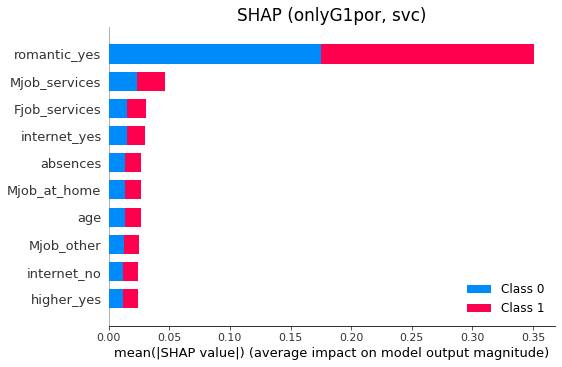

In [114]:
import shap
shap.initjs()
shap.summary_plot(shap_values, X_class_test_prep[:10], feature_names=feature_names, max_display=10, show=False)
plt.title("SHAP (onlyG1por, svc)")
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/onlyG1por/svc/'
#plt.savefig(path + 'svc_shap.png',bbox_inches='tight')
plt.show()

In [115]:
# load saved data
import pickle
fname = '../results/onlyG1por/svc/onlyG1por_svc_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

In [116]:
import shap
shap.initjs() # required for visualizations later on
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
# create the explainer
explainer = shap.KernelExplainer(grid.best_estimator_[1].predict, X_test_transformed[:10])
print(np.shape(X_test_transformed))
# calculate shap values
shap_values = explainer.shap_values(X_test_transformed[:10])
print(np.shape(shap_values))

(130, 46)



(10, 46)


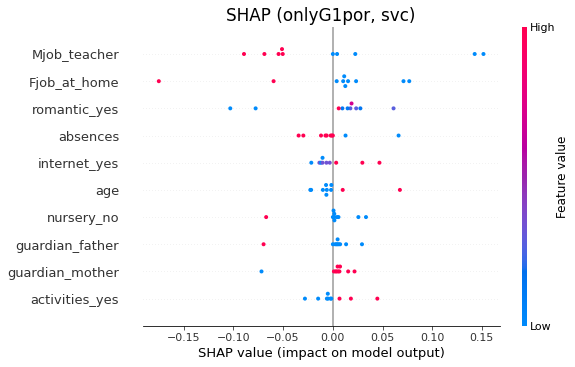

In [117]:
shap.summary_plot(shap_values, X_test_transformed[:10], feature_names=feature_names, max_display=10, show=False)
plt.title("SHAP (onlyG1por, svc)")
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/onlyG1por/svc/'
plt.savefig(path + 'svc_shap.png',bbox_inches='tight')
plt.show()

1.0


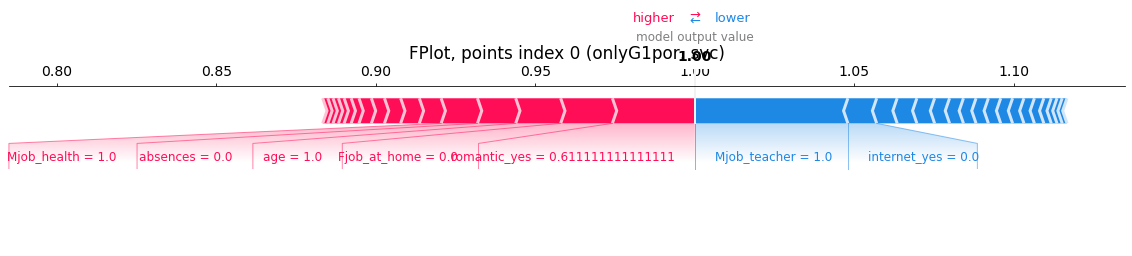

In [63]:
index = 0 # the index of the point to explain
print(explainer.expected_value) # we explain user 0 predictions
shap.force_plot(explainer.expected_value, shap_values[index,:], 
                features = X_test_transformed[index,:],feature_names = feature_names, show=False,matplotlib=True)
plt.title('FPlot, points index 0 (onlyG1por, svc)')
plt.savefig('../figures/onlyG1por/svc/svc_fplot1.png',bbox_inches='tight')

1.0


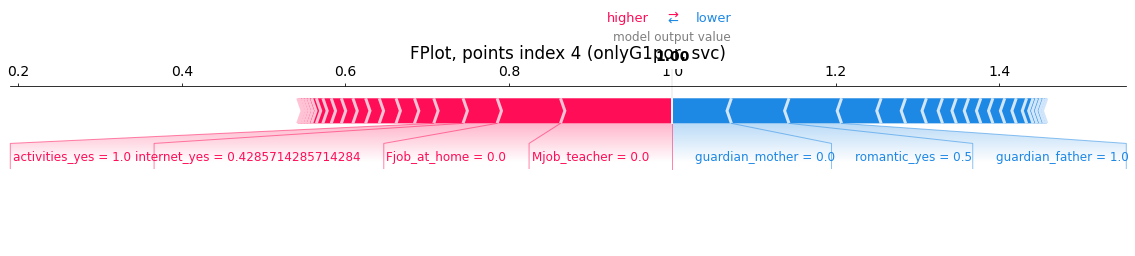

In [64]:
index = 4 # the index of the point to explain
print(explainer.expected_value) # we explain user 0 predictions
shap.force_plot(explainer.expected_value, shap_values[index,:], 
                features = X_test_transformed[index,:],feature_names = feature_names, show=False,matplotlib=True)
plt.title('FPlot, points index 4 (onlyG1por, svc)')
plt.savefig('../figures/onlyG1por/svc/svc_fplot2.png',bbox_inches='tight')

1.0


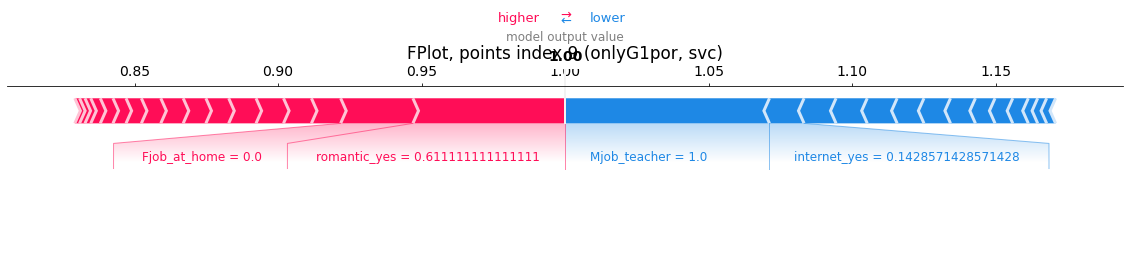

In [65]:
index = 9 # the index of the point to explain
print(explainer.expected_value) # we explain user 0 predictions
shap.force_plot(explainer.expected_value, shap_values[index,:], 
                features = X_test_transformed[index,:],feature_names = feature_names, show=False,matplotlib=True)
plt.title('FPlot, points index 9 (onlyG1por, svc)')
plt.savefig('../figures/onlyG1por/svc/svc_fplot3.png',bbox_inches='tight')

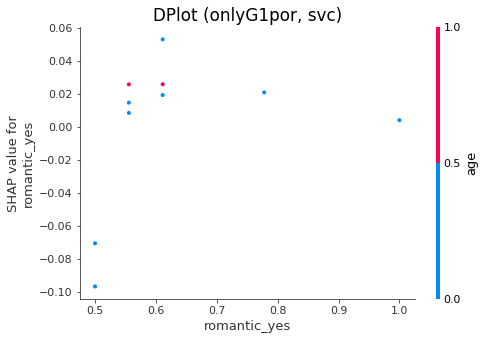

In [66]:
ftr = 'romantic_yes'
shap.dependence_plot(ftr, shap_values, X_test_transformed[:10], feature_names=feature_names, show=False)
plt.title('DPlot (onlyG1por, svc)')
plt.savefig('../figures/onlyG1por/svc/svc_dplot1.png',bbox_inches='tight')

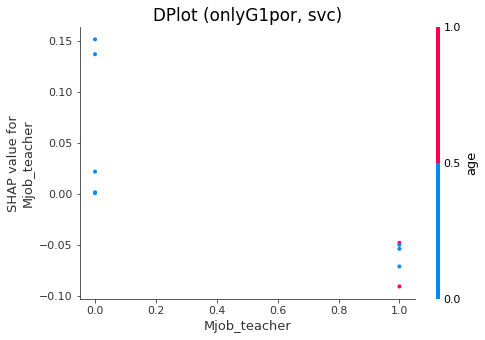

In [67]:
ftr = 'Mjob_teacher'
shap.dependence_plot(ftr, shap_values, X_test_transformed[:10], feature_names=feature_names, show=False)
plt.title('DPlot (onlyG1por, svc)')
plt.savefig('../figures/onlyG1por/svc/svc_dplot2.png',bbox_inches='tight')

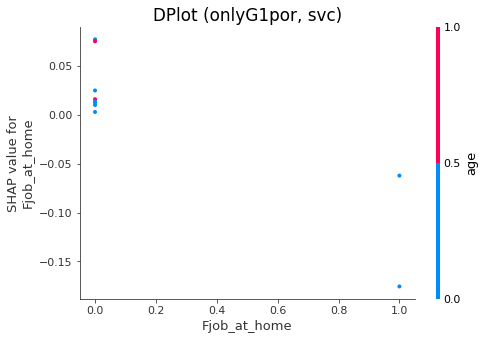

In [68]:
ftr = 'Fjob_at_home'
shap.dependence_plot(ftr, shap_values, X_test_transformed[:10], feature_names=feature_names, show=False)
plt.title('DPlot (onlyG1por, svc)')
plt.savefig('../figures/onlyG1por/svc/svc_dplot3.png',bbox_inches='tight')

## 3c. CONFUSION MATRIX

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [70]:
# load saved data
import pickle
fname = '../results/onlyG1por/svc/onlyG1por_svc_bestmodel_score'+'.save'
file = open(fname, 'rb')
grid, X_test, y_test = pickle.load(file)
file.close()

confusion matrix : [[  9  10]
 [  1 110]]


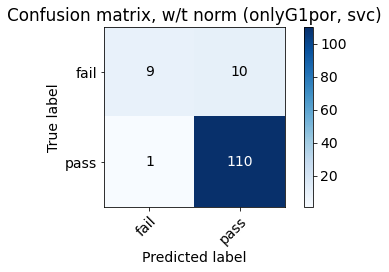

normalized confusion matrix : [[0.47368421 0.52631579]
 [0.00900901 0.99099099]]


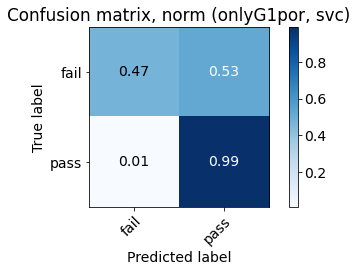

In [71]:
y_pred = grid.best_estimator_.predict(X_test)
# not-normalized
conf_mat = confusion_matrix(y_test, y_pred)
print("confusion matrix :", conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=['fail','pass'])
plt.title('Confusion matrix, w/t norm (onlyG1por, svc)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/onlyG1por/svc/'
plt.savefig(path + 'svc_cm.png')
plt.show()

# normalized
norm_conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
print("normalized confusion matrix :",norm_conf_mat)
plot_confusion_matrix(y_test,y_pred,classes=['fail','pass'],normalize= True )
plt.title('Confusion matrix, norm (onlyG1por, svc)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/onlyG1por/svc/'
plt.savefig(path + 'svc_cmnorm.png')
plt.show()

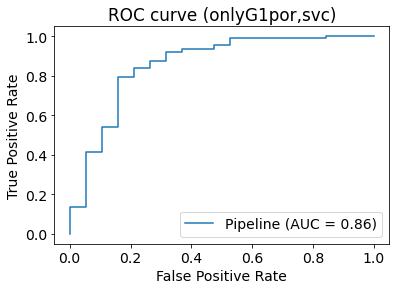

In [72]:
from sklearn import metrics
metrics.plot_roc_curve(grid.best_estimator_, X_test, y_test)
plt.title('ROC curve (onlyG1por,svc)')
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/onlyG1por/svc/'
plt.savefig(path + 'svc_roc.png')

# PART C: SUMMARY

In [73]:
# load saved data
import pickle
fname = '../results/onlyG1por/logreg/onlyG1por_logreg_model_mean_std'+'.save'
file = open(fname, 'rb')
mean_test_scores, std_test_scores, model_mean, model_std = pickle.load(file)
file.close()

In [74]:
# load saved data
import pickle
fname = '../results/onlyG1por/rf/onlyG1por_rf_model_mean_std'+'.save'
file = open(fname, 'rb')
mean_test_scores, std_test_scores, model_mean, model_std = pickle.load(file)
file.close()

In [75]:
# load saved data
import pickle
fname = '../results/onlyG1por/svc/onlyG1por_svc_model_mean_std'+'.save'
file = open(fname, 'rb')
mean_test_scores, std_test_scores, model_mean, model_std = pickle.load(file)
file.close()

In [76]:
print(model_mean)
print(model_std)

[0.889, 0.915, 0.875]
[0.02, 0.022, 0.024]


In [77]:
# save the output so I can use it later
fname = '../results/onlyG1por/onlyG1por_model_mean_std'+'.save'
file = open(fname, 'wb')
pickle.dump((model_mean, model_std), file)
file.close()

In [78]:
ML_models = ["logreg", 'rf', 'svc']

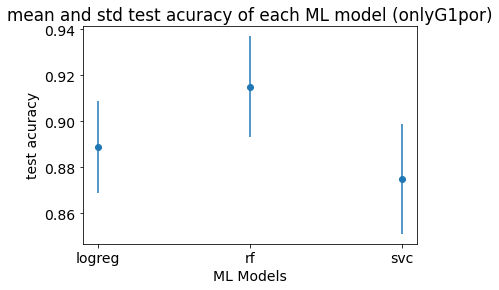

In [79]:
plt.errorbar(ML_models ,model_mean, yerr = model_std, fmt="o")
plt.xlabel("ML Models")
plt.ylabel("test acuracy")
plt.title("mean and std test acuracy of each ML model (onlyG1por)")
path = '/Users/anniephan/Desktop/Data_Science_Master/DATA_1030/data1030_project/figures/onlyG1por/'
plt.savefig(path + 'onlyG1por_model_mean_std.png', bbox_inches='tight')

In [80]:
baseline = np.sum(y == 1)/len(y)
baseline 

0.8459167950693375

In [81]:
std_above_baseline = []
for i in range(3):
    std_abv_bsl = np.around(((model_mean[i] - baseline)/model_std[i]),3)
    std_above_baseline.append(std_abv_bsl)
std_above_baseline

[2.154, 3.14, 1.212]

In [82]:
# save the output so I can use it later
fname = '../results/onlyG1por/onlyG1por_model_mean_std'+'.save'
file = open(fname, 'wb')
pickle.dump((model_mean, model_std), file)
file.close()

In [83]:
results = pd.DataFrame(ML_models)
results.rename(columns = {0:'ML_models'}, inplace = True) 
results["Mean_onlyG1por"] = model_mean
results["Std_onlyG1por"] = model_std
results["Std_abv_bsl_onlyG1por"] = std_above_baseline
results

,ML_models,Mean_onlyG1por,Std_onlyG1por,Std_abv_bsl_onlyG1por
0,logreg,0.889,0.020,2.154
1,rf,0.915,0.022,3.140
2,svc,0.875,0.024,1.212


In [84]:
print("best params for ML models:", best_params)

best params for ML models: [{'logisticregression__C': 100.0}, {'randomforestclassifier__max_depth': 2, 'randomforestclassifier__max_features': 0.625}, {'svc__C': 1000.0, 'svc__gamma': 0.001}]


In [85]:
# save the output so I can use it later
fname = '../results/onlyG1por/onlyG1por_best_params'+'.save'
file = open(fname, 'wb')
pickle.dump((best_params), file)
file.close()